In [109]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [110]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: my_first_submission.csv
  File: .DS_Store
  File: explore_locA.ipynb
  File: test.csv
  File: Readme.md
  File: sample_submission.csv
  File: read_files.ipynb
Directory: ./A
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./C
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./B
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet


In [111]:
train_a = pd.read_parquet('A/train_targets.parquet')
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')

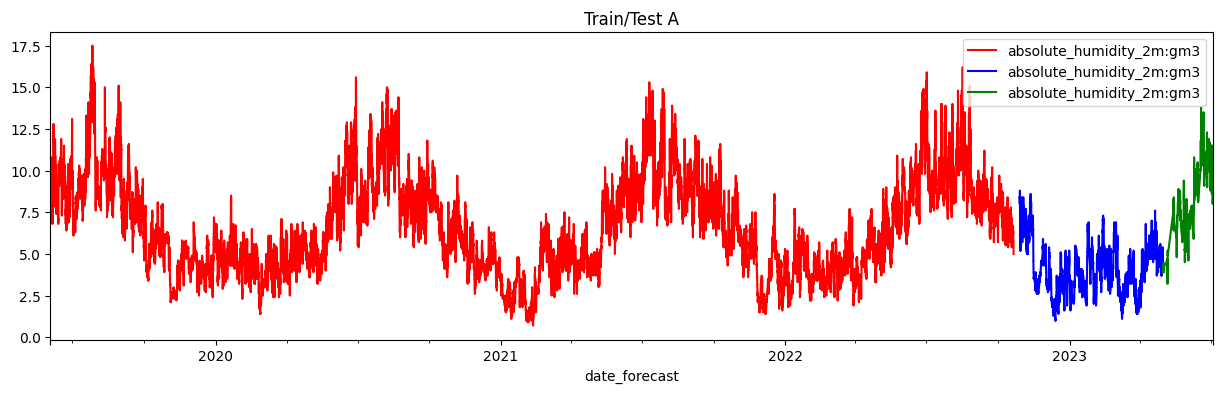

In [112]:
fig, ax = plt.subplots(figsize=(15, 4))
feature_name = 'absolute_humidity_2m:gm3'

# Plot the A datasets
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=ax, title='Train/Test A', color='red', label='Observed A')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=ax, color='blue', label='Estimated A')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=ax, color='green', label='Test A')

# Customize the legend
ax.legend()

# Show the plot
plt.show()

In [113]:
# Print min and max values of the date_forecast column for each dataset
print("X_train_estimated_a - Min Date Forecast:", X_train_estimated_a['date_forecast'].min())
print("X_train_estimated_a - Max Date Forecast:", X_train_estimated_a['date_forecast'].max())

print("\nX_train_observed_a - Min Date Forecast:", X_train_observed_a['date_forecast'].min())
print("X_train_observed_a - Max Date Forecast:", X_train_observed_a['date_forecast'].max())

print("\nX_test_estimated_a - Min Date Forecast:", X_test_estimated_a['date_forecast'].min())
print("X_test_estimated_a - Max Date Forecast:", X_test_estimated_a['date_forecast'].max())

print("\ntrain targets - Min Date Forecast:", train_a['time'].min())
print("train targets - Max Date Forecast:", train_a['time'].max())

X_train_estimated_a - Min Date Forecast: 2022-10-28 22:00:00
X_train_estimated_a - Max Date Forecast: 2023-04-30 23:45:00

X_train_observed_a - Min Date Forecast: 2019-06-02 22:00:00
X_train_observed_a - Max Date Forecast: 2022-10-21 01:00:00

X_test_estimated_a - Min Date Forecast: 2023-05-01 00:00:00
X_test_estimated_a - Max Date Forecast: 2023-07-03 23:45:00

train targets - Min Date Forecast: 2019-06-02 22:00:00
train targets - Max Date Forecast: 2023-04-30 23:00:00


In [114]:
training = pd.concat([X_train_estimated_a, X_train_observed_a], axis=0)

# Assuming 'date_forecast' is a datetime column
training['hourly_timestamp'] = training['date_forecast'].dt.floor('H')

# Group by 'hourly_timestamp' and calculate the mean for each group
training = training.groupby('hourly_timestamp').mean().reset_index()

# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
training = training.drop(columns=['hourly_timestamp'])
training['date_forecast'] = training['date_forecast'].dt.floor('H')
training

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,NaT,2019-06-02 22:00:00,7.700,1.22825,1728.949951,0.000000,0.000,1728.949951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.074997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1006.299988,0.0,0.0,993.750000,999.775024,0.0,0.000,71.674995,1005.799988,NaN,0.0,0.0,0.0,0.175,348.036743,-3.77425,0.000,286.225006,100.000000,40386.476562,3.600,-3.575,-0.500,0.0
1,NaT,2019-06-02 23:00:00,7.700,1.22350,1689.824951,0.000000,0.000,1689.824951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.750000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1005.200012,0.0,0.0,992.674988,998.650024,0.0,0.025,68.000000,1004.650024,NaN,0.0,0.0,0.0,0.200,91.980751,-4.35725,0.000,286.899994,100.000000,33770.648438,3.350,-3.350,0.275,0.0
2,NaT,2019-06-03 00:00:00,7.875,1.21975,1563.224976,0.000000,0.000,1563.224976,0.0,280.649994,0.000,0.000000,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1004.525024,0.0,0.0,992.000000,997.974976,0.0,0.100,67.949997,1003.950012,NaN,0.0,0.0,0.0,0.400,14.934750,-3.30950,0.000,286.950012,100.000000,13595.500000,3.050,-2.950,0.750,0.0
3,NaT,2019-06-03 01:00:00,8.425,1.21800,1283.425049,208.649994,0.750,1283.425049,0.0,281.674988,0.300,526.775024,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.25,1.00,1004.025024,0.0,0.0,991.500000,997.449951,0.0,0.125,73.875000,1003.449951,NaN,0.0,0.0,0.0,0.550,28.630251,-0.82250,0.000,286.750000,100.000000,2321.850098,2.725,-2.600,0.875,0.0
4,NaT,2019-06-03 02:00:00,8.950,1.21800,1003.500000,32468.150391,23.100,1003.500000,0.0,282.500000,11.975,22068.949219,0.15,282.975006,84.875000,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,1003.099976,0.0,0.0,990.550049,996.500000,0.0,0.100,79.925003,1002.500000,NaN,0.0,0.0,0.0,0.250,41.997501,3.05125,0.000,286.450012,99.224998,11634.799805,2.550,-2.350,0.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34057,2023-04-29 07:00:05,2023-04-30 19:00:00,4.550,1.27650,1674.199951,84464.945312,4.225,542.700012,0.0,272.424988,2.825,56431.050781,0.10,13230.649414,96.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.50,0.75,1014.750000,0.0,0.0,1001.574951,1007.799988,0.0,0.000,74.625000,1014.049988,NaN,0.0,0.0,0.0,0.000,304.939240,-0.18050,0.000,275.024994,96.699997,23417.074219,5.175,4.800,1.925,0.0
34058,2023-04-29 07:00:05,2023-04-30 20:00:00,4.500,1.27975,1762.400024,2270.875000,0.000,546.400024,0.0,272.299988,0.000,5067.875000,0.00,176.350006,94.224998,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.700012,0.0,0.0,1001.549988,1007.799988,0.0,0.000,76.875000,1014.049988,NaN,0.0,0.0,0.0,0.000,318.625763,-5.17600,0.000,274.650024,94.525002,21084.050781,4.650,4.025,2.300,0.0
34059,2023-04-29 07:00:05,2023-04-30 21:00:00,4.500,1.28100,1696.650024,0.000000,0.000,548.349976,0.0,272.299988,0.000,0.000000,0.00,0.000000,94.324997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.549988,0.0,0.0,1001.400024,1007.674988,0.0,0.000,77.775002,1013.925049,NaN,0.0,0.0,0.0,0.000,332.785736,-8.95075,0.000,274.524994,95.675003,20792.500000,4.450,3.575,2.600,0.0
34060,2023-04-29 07:00:05,2023-04-30 22:00:00,4.500,1.28100,1353.400024,0.000000,0.000,527.775024,0.0,272.299988,0.000,0.000

In [115]:
print("\nX_train_observed_a - Min Date Forecast:", training['date_forecast'].min())
print("X_train_observed_a - Max Date Forecast:", training['date_forecast'].max())

print("\nX_test_estimated_a - Min Date Forecast:", X_test_estimated_a['date_forecast'].min())
print("X_test_estimated_a - Max Date Forecast:", X_test_estimated_a['date_forecast'].max())

print("\ntrain targets - Min Date Forecast:", train_a['time'].min())
print("train targets - Max Date Forecast:", train_a['time'].max())


X_train_observed_a - Min Date Forecast: 2019-06-02 22:00:00
X_train_observed_a - Max Date Forecast: 2023-04-30 23:00:00

X_test_estimated_a - Min Date Forecast: 2023-05-01 00:00:00
X_test_estimated_a - Max Date Forecast: 2023-07-03 23:45:00

train targets - Min Date Forecast: 2019-06-02 22:00:00
train targets - Max Date Forecast: 2023-04-30 23:00:00


In [116]:
train_a

,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
...,...,...
34080,2023-04-30 19:00:00,9.02
34081,2023-04-30 20:00:00,0.00
34082,2023-04-30 21:00:00,0.00
34083,2023-04-30 22:00:00,0.00


In [117]:
merged_data = pd.merge(train_a, training, left_on='time', right_on='date_forecast', how='inner')
merged_data

,time,pv_measurement,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,0.00,NaT,2019-06-02 22:00:00,7.700,1.22825,1728.949951,0.000000,0.000,1728.949951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.074997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1006.299988,0.0,0.0,993.750000,999.775024,0.0,0.000,71.674995,1005.799988,NaN,0.0,0.0,0.0,0.175,348.036743,-3.77425,0.000,286.225006,100.000000,40386.476562,3.600,-3.575,-0.500,0.0
1,2019-06-02 23:00:00,0.00,NaT,2019-06-02 23:00:00,7.700,1.22350,1689.824951,0.000000,0.000,1689.824951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.750000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1005.200012,0.0,0.0,992.674988,998.650024,0.0,0.025,68.000000,1004.650024,NaN,0.0,0.0,0.0,0.200,91.980751,-4.35725,0.000,286.899994,100.000000,33770.648438,3.350,-3.350,0.275,0.0
2,2019-06-03 00:00:00,0.00,NaT,2019-06-03 00:00:00,7.875,1.21975,1563.224976,0.000000,0.000,1563.224976,0.0,280.649994,0.000,0.000000,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1004.525024,0.0,0.0,992.000000,997.974976,0.0,0.100,67.949997,1003.950012,NaN,0.0,0.0,0.0,0.400,14.934750,-3.30950,0.000,286.950012,100.000000,13595.500000,3.050,-2.950,0.750,0.0
3,2019-06-03 01:00:00,0.00,NaT,2019-06-03 01:00:00,8.425,1.21800,1283.425049,208.649994,0.750,1283.425049,0.0,281.674988,0.300,526.775024,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.25,1.00,1004.025024,0.0,0.0,991.500000,997.449951,0.0,0.125,73.875000,1003.449951,NaN,0.0,0.0,0.0,0.550,28.630251,-0.82250,0.000,286.750000,100.000000,2321.850098,2.725,-2.600,0.875,0.0
4,2019-06-03 02:00:00,19.36,NaT,2019-06-03 02:00:00,8.950,1.21800,1003.500000,32468.150391,23.100,1003.500000,0.0,282.500000,11.975,22068.949219,0.15,282.975006,84.875000,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,1003.099976,0.0,0.0,990.550049,996.500000,0.0,0.100,79.925003,1002.500000,NaN,0.0,0.0,0.0,0.250,41.997501,3.05125,0.000,286.450012,99.224998,11634.799805,2.550,-2.350,0.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34056,2023-04-30 19:00:00,9.02,2023-04-29 07:00:05,2023-04-30 19:00:00,4.550,1.27650,1674.199951,84464.945312,4.225,542.700012,0.0,272.424988,2.825,56431.050781,0.10,13230.649414,96.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.50,0.75,1014.750000,0.0,0.0,1001.574951,1007.799988,0.0,0.000,74.625000,1014.049988,NaN,0.0,0.0,0.0,0.000,304.939240,-0.18050,0.000,275.024994,96.699997,23417.074219,5.175,4.800,1.925,0.0
34057,2023-04-30 20:00:00,0.00,2023-04-29 07:00:05,2023-04-30 20:00:00,4.500,1.27975,1762.400024,2270.875000,0.000,546.400024,0.0,272.299988,0.000,5067.875000,0.00,176.350006,94.224998,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.700012,0.0,0.0,1001.549988,1007.799988,0.0,0.000,76.875000,1014.049988,NaN,0.0,0.0,0.0,0.000,318.625763,-5.17600,0.000,274.650024,94.525002,21084.050781,4.650,4.025,2.300,0.0
34058,2023-04-30 21:00:00,0.00,2023-04-29 07:00:05,2023-04-30 21:00:00,4.500,1.28100,1696.650024,0.000000,0.000,548.349976,0.0,272.299988,0.000,0.000000,0.00,0.000000,94.324997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.549988,0.0,0.0,1001.400024,1007.674988,0.0,0.000,77.775002,1013.925049

In [118]:
merged_data = merged_data.drop(columns=['date_forecast'])

In [119]:
merged_data

,time,pv_measurement,date_calc,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,0.00,NaT,7.700,1.22825,1728.949951,0.000000,0.000,1728.949951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.074997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1006.299988,0.0,0.0,993.750000,999.775024,0.0,0.000,71.674995,1005.799988,NaN,0.0,0.0,0.0,0.175,348.036743,-3.77425,0.000,286.225006,100.000000,40386.476562,3.600,-3.575,-0.500,0.0
1,2019-06-02 23:00:00,0.00,NaT,7.700,1.22350,1689.824951,0.000000,0.000,1689.824951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.750000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1005.200012,0.0,0.0,992.674988,998.650024,0.0,0.025,68.000000,1004.650024,NaN,0.0,0.0,0.0,0.200,91.980751,-4.35725,0.000,286.899994,100.000000,33770.648438,3.350,-3.350,0.275,0.0
2,2019-06-03 00:00:00,0.00,NaT,7.875,1.21975,1563.224976,0.000000,0.000,1563.224976,0.0,280.649994,0.000,0.000000,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1004.525024,0.0,0.0,992.000000,997.974976,0.0,0.100,67.949997,1003.950012,NaN,0.0,0.0,0.0,0.400,14.934750,-3.30950,0.000,286.950012,100.000000,13595.500000,3.050,-2.950,0.750,0.0
3,2019-06-03 01:00:00,0.00,NaT,8.425,1.21800,1283.425049,208.649994,0.750,1283.425049,0.0,281.674988,0.300,526.775024,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.25,1.00,1004.025024,0.0,0.0,991.500000,997.449951,0.0,0.125,73.875000,1003.449951,NaN,0.0,0.0,0.0,0.550,28.630251,-0.82250,0.000,286.750000,100.000000,2321.850098,2.725,-2.600,0.875,0.0
4,2019-06-03 02:00:00,19.36,NaT,8.950,1.21800,1003.500000,32468.150391,23.100,1003.500000,0.0,282.500000,11.975,22068.949219,0.15,282.975006,84.875000,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,1003.099976,0.0,0.0,990.550049,996.500000,0.0,0.100,79.925003,1002.500000,NaN,0.0,0.0,0.0,0.250,41.997501,3.05125,0.000,286.450012,99.224998,11634.799805,2.550,-2.350,0.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34056,2023-04-30 19:00:00,9.02,2023-04-29 07:00:05,4.550,1.27650,1674.199951,84464.945312,4.225,542.700012,0.0,272.424988,2.825,56431.050781,0.10,13230.649414,96.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.50,0.75,1014.750000,0.0,0.0,1001.574951,1007.799988,0.0,0.000,74.625000,1014.049988,NaN,0.0,0.0,0.0,0.000,304.939240,-0.18050,0.000,275.024994,96.699997,23417.074219,5.175,4.800,1.925,0.0
34057,2023-04-30 20:00:00,0.00,2023-04-29 07:00:05,4.500,1.27975,1762.400024,2270.875000,0.000,546.400024,0.0,272.299988,0.000,5067.875000,0.00,176.350006,94.224998,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.700012,0.0,0.0,1001.549988,1007.799988,0.0,0.000,76.875000,1014.049988,NaN,0.0,0.0,0.0,0.000,318.625763,-5.17600,0.000,274.650024,94.525002,21084.050781,4.650,4.025,2.300,0.0
34058,2023-04-30 21:00:00,0.00,2023-04-29 07:00:05,4.500,1.28100,1696.650024,0.000000,0.000,548.349976,0.0,272.299988,0.000,0.000000,0.00,0.000000,94.324997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,1014.549988,0.0,0.0,1001.400024,1007.674988,0.0,0.000,77.775002,1013.925049,NaN,0.0,0.0,0.0,0.000,332.785736,-8.95075,0.000,274.524994,95.675003,20792.500000,4.450,3.575,2.600,0.0
34059,2023-04-30 22:00:00,0.00,2023-04-29 07:00:05,4.500,1.28100,1353.400

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have your dataset loaded into merged_data

# Remove rows with NaN values
merged_data = merged_data.dropna()
merged_data = merged_data.select_dtypes(include=['number'])

# Split the dataset into features (X) and the target variable (y)
X = merged_data.drop(columns=['pv_measurement'])  # Features
y = merged_data['pv_measurement']  # Target variable

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 35167.33745253308


In [123]:
for true_value, predicted_value in zip(y_test, predictions):
    print(f"True Value: {true_value}, Predicted Value: {predicted_value}")

True Value: 0.0, Predicted Value: 81.959716796875
True Value: 0.0, Predicted Value: 77.268798828125
True Value: 0.0, Predicted Value: 69.346923828125
True Value: 1028.28, Predicted Value: 754.9632568359375
True Value: 0.0, Predicted Value: -161.73583984375
True Value: 0.0, Predicted Value: 2.66650390625
True Value: 0.0, Predicted Value: -49.253662109375
True Value: 0.0, Predicted Value: 122.582275390625
True Value: 0.0, Predicted Value: -150.205810546875
True Value: 0.0, Predicted Value: -9.519287109375
True Value: 0.0, Predicted Value: 16.953125
True Value: 0.0, Predicted Value: -205.6103515625
True Value: 0.44, Predicted Value: -1.28271484375
True Value: 0.0, Predicted Value: -201.97314453125
True Value: 39.82000000000001, Predicted Value: 422.08251953125
True Value: 0.0, Predicted Value: -51.691650390625
True Value: 0.0, Predicted Value: 47.17578125
True Value: 0.0, Predicted Value: 84.225341796875
True Value: 286.44, Predicted Value: 848.2052001953125
True Value: 0.0, Predicted Val